In [3]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-28a482f3-2baa-02fb-ec56-138f8ddb37bb)


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

os.chdir('./CycleSR/')

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pip install --upgrade pip
!pip uninstall scikit-image
!pip install scikit-image
import skimage
print(skimage.__version__)
# skimage 0.19.0 is compulsory

     |████████████████████████████████| 2.1 MB 5.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Found existing installation: scikit-image 0.18.3
Uninstalling scikit-image-0.18.3:
  Would remove:
    /usr/local/bin/skivi
    /usr/local/lib/python3.7/dist-packages/scikit_image-0.18.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_image.libs/libgomp-3300acd3.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/skimage/*
Proceed (Y/n)? y
y
  Successfully uninstalled scikit-image-0.18.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 70.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
0.19.2


In [ ]:
%cd ./pytorch_wavelets/
!pip install .
%cd ../

/content/drive/MyDrive/Colab Notebooks/CycleSR/pytorch_wavelets
Processing /content/drive/MyDrive/Colab Notebooks/CycleSR/pytorch_wavelets
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-wavelets: filename=pytorch_wavelets-1.3.0-py3-none-any.whl size=55125 sha256=88adbc2839c6674ba193af3a462c50c509d4f2885bf30e13a717497c92a94cde
  Stored in directory: /tmp/pip-ephem-wheel-cache-9ozcfnwg/wheels/c2/68/5e/51fa73a99f70fdfe25ce12e2bc3c4ece9a0b825a1a53184fe5
Successfully built pytorch-wavelets
/content/drive/MyDrive/Colab Notebooks/CycleSR


In [ ]:
!python train.py --decay_epoch 30 --pretrained False --n_epochs 55 --lr 2e-4 --scheduler False --dataroot "./dataset/Colab_random_OCTA_augmented"
# !python train.py --decay_epoch 30 --pretrained False --n_epochs 55 --lr 2e-3 --scheduler False --dataroot "./dataset/test"

Namespace(B2A=False, batchSize=1, cuda=False, dataroot='./dataset/Colab_random_OCTA_augmented', decay_epoch=30, epoch=0, input_nc=1, lr=0.0002, n_cpu=2, n_epochs=55, output_nc=1, pretrained=True, pretrained_root='./pre_trained/netG_A2B_pretrained.pth', scheduler=True, sizeA=128, sizeB=256)
# FS type: gau, kernel size=5
# FS type: gau, kernel size=5
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
354
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
Epoch (1/55) Finished
traning PSNR: 2.2565 SSIM: 0.0878 NMI: 2.3791
100% 297/297 [01:29<00:00,  3.33it/s]
 PSNR: 15.8248 SSIM: 0.1691 MSE: 0.1053 NMI: 1.0373
 PSNR: 14.8466 SSIM: 0.1534 MSE: 0.1347 NMI: 1.0325
------------------------------------------
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
Epoch (2/55) Finished
traning PSNR: 1.1769 SSIM: 0.1001 NMI: 3.0505
100% 297/297 [01:27<00:0

In [ ]:
!python train.py --decay_epoch 30 --pretrained False --n_epochs 55 --lr 2e-4 --scheduler False --dataroot "./dataset/Colab_random_OCTA_augmented"

Namespace(B2A=False, batchSize=1, cuda=False, dataroot='./dataset/Colab_random_OCTA_augmented', decay_epoch=30, epoch=0, input_nc=1, lr=0.0002, n_cpu=2, n_epochs=55, output_nc=1, pretrained=True, pretrained_root='./pre_trained/netG_A2B_pretrained.pth', scheduler=True, sizeA=128, sizeB=256)
# FS type: gau, kernel size=5
# FS type: gau, kernel size=5
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
354
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
Epoch (1/55) Finished
traning PSNR: 23.4394 SSIM: 0.8320 NMI: 0.0181
100% 297/297 [01:30<00:00,  3.30it/s]
 PSNR: 16.9770 SSIM: 0.4473 MSE: 0.0813 NMI: 1.0544
 PSNR: 16.8270 SSIM: 0.4537 MSE: 0.0852 NMI: 1.0560
------------------------------------------
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
Epoch (2/55) Finished
traning PSNR: 20.0416 SSIM: 0.7545 NMI: 0.0396
100% 297/297 [01:29<00

In [ ]:
from model import NetworkA2B
import torch
import glob
import random
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import utils
from baseline import ResnetGenerator, UnetGenerator
from utils import eval, eval_6m

In [ ]:
from utils import eval_6m, eval_6m_baseline

Test Set Evaluation

In [ ]:
def img_input(img):
  hf = utils.high_pass(img[0], i=10).unsqueeze(0).unsqueeze(0)
  hf = (hf+img)/2.0
  lf = utils.low_pass(img[0], i=8).unsqueeze(0).unsqueeze(0)
  return (lf, hf)

In [ ]:
import argparse
import glob
import random
import os
from PIL import Image
import numpy as np
import time
import datetime
import sys
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable
import itertools
import matplotlib.pyplot as plt
import pdb
import skimage.metrics
from tqdm import tqdm
import cv2

In [ ]:
def eval(model, epoch=0):
    # lr = "./dataset/OCTA_new/6mm_CROPPED/"
    # hr = "./dataset/OCTA_new/3mm_CROPPED/"
    lr = "./dataset/test/6x6_256/"
    hr = "./dataset/test/3x3_256/"
    num, psnr, ssim, mse, nmi= 0, 0, 0, 0, 0
    model.eval()
    T_1 = transforms.Compose([ transforms.ToTensor(),
                transforms.Normalize((0.5), (0.5)),
                # transforms.Resize([128, 128])
                 ])
    T_2 = transforms.Compose([ transforms.ToTensor(),                         
                  transforms.Normalize((0.5), (0.5))])
    mx, out = 1000, 0
    for i in (range(297)):
        lr_path = os.path.join(lr, str(i)+"_3.png")
        hr_path = os.path.join(hr, str(i)+"_6.png")
        if os.path.isfile(lr_path) and os.path.isfile(hr_path):
            lr_img = Image.open(lr_path).convert('L')
            hr_img = Image.open(hr_path).convert('L')
            
            lr_img = T_1(lr_img).cuda().unsqueeze(0)
            hr_img = T_2(hr_img).cuda().unsqueeze(0)
            
            hf = utils.high_pass(lr_img[0], i=10).unsqueeze(0).unsqueeze(0)
            hf = (hf+lr_img)/2.0
            lf = utils.low_pass(lr_img[0], i=8).unsqueeze(0).unsqueeze(0)
            _, _, sr_img = model(lf, hf)

            yimg = sr_img.cpu().detach().numpy().squeeze(0).squeeze(0)
            gtimg = hr_img.cpu().detach().numpy().squeeze(0).squeeze(0)
            p = skimage.metrics.peak_signal_noise_ratio(yimg, gtimg, data_range=2)
            s = skimage.metrics.structural_similarity(yimg, gtimg)
            psnr += (p)
            if 18<p<18.1 and (i!=68) and (i!=30):
              mx = p
              out = i
              print(i)
            ssim += (s)
            mse += (skimage.metrics.mean_squared_error(yimg, gtimg))
            nmi += (skimage.metrics.normalized_mutual_information(yimg, gtimg))
            num += 1
    print(" PSNR: %.4f SSIM: %.4f MSE: %.4f NMI: %.4f"%(psnr/num, ssim/num, mse/num, nmi/num))
    print(out, mx)

In [ ]:
class Test_ImageDataset(Dataset):
    def __init__(self, root, transforms_test=None, unaligned=False, mode='test'):
        self.transformA = transforms.Compose(transforms_test)
        self.transformB = transforms.Compose(transforms_test)

        self.unaligned = unaligned

        self.files_A = sorted(glob.glob(os.path.join(root, '6x6_256/') + '/*.*'))
        self.files_B = sorted(glob.glob(os.path.join(root, '3x3_256/') + '/*.*'))

    def __getitem__(self, index):
        path_A = self.files_A[index % len(self.files_A)]
        img_A = Image.open(path_A).convert('L')
        # print(self.files_A[index % len(self.files_A)])

        item_A = self.transformA(img_A)
        path_B = path_A.replace("_3.", "_6.").replace("6x6", "3x3")

        item_B = self.transformB(Image.open(path_B).convert('L'))

        return {'A': item_A, 'B': item_B}

    def __len__(self):
        return max(len(self.files_A), len(self.files_B))

test_path = "./dataset/test/"
transforms_test = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5))
                ]
test_dataset = Test_ImageDataset(test_path, transforms_test=transforms_test, unaligned=True)

In [ ]:
netG_A2B = NetworkA2B().cuda()
netG_A2B
# model = torch.load("./output_exp/netG_A2B_epoch40.pth")
# model = torch.load("./output_exp/netG_A2B_epoch5.pth")
model = torch.load("./pre_trained/netG_A2B_epoch34.pth")
netG_A2B.load_state_dict(model, strict=False)

_IncompatibleKeys(missing_keys=['resnet.InBlock.0.weight', 'resnet.InBlock.2.weight', 'resnet.InBlock.4.weight', 'resnet.ResidualBlock.0.conv_block.0.weight', 'resnet.ResidualBlock.0.conv_block.1.weight', 'resnet.ResidualBlock.0.conv_block.1.bias', 'resnet.ResidualBlock.0.conv_block.1.running_mean', 'resnet.ResidualBlock.0.conv_block.1.running_var', 'resnet.ResidualBlock.0.conv_block.3.weight', 'resnet.ResidualBlock.0.conv_block.4.weight', 'resnet.ResidualBlock.0.conv_block.4.bias', 'resnet.ResidualBlock.0.conv_block.4.running_mean', 'resnet.ResidualBlock.0.conv_block.4.running_var', 'resnet.ResidualBlock.1.conv_block.0.weight', 'resnet.ResidualBlock.1.conv_block.1.weight', 'resnet.ResidualBlock.1.conv_block.1.bias', 'resnet.ResidualBlock.1.conv_block.1.running_mean', 'resnet.ResidualBlock.1.conv_block.1.running_var', 'resnet.ResidualBlock.1.conv_block.3.weight', 'resnet.ResidualBlock.1.conv_block.4.weight', 'resnet.ResidualBlock.1.conv_block.4.bias', 'resnet.ResidualBlock.1.conv_block

(-0.5, 255.5, 255.5, -0.5)

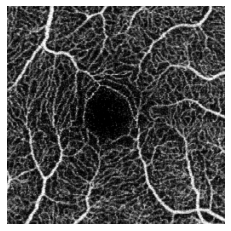

In [ ]:
num = 2
lr = test_dataset[num]['A'].cuda()
hr = test_dataset[num]['B'].cuda()
hf = utils.high_pass(hr, i=10)
lf = utils.low_pass(hr, i=10).cpu().detach().numpy()
hf = ((lr+hf)/2).cpu().detach().numpy()
plt.imshow(hr.cpu().detach().numpy()[0],"gray")
plt.axis('off')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


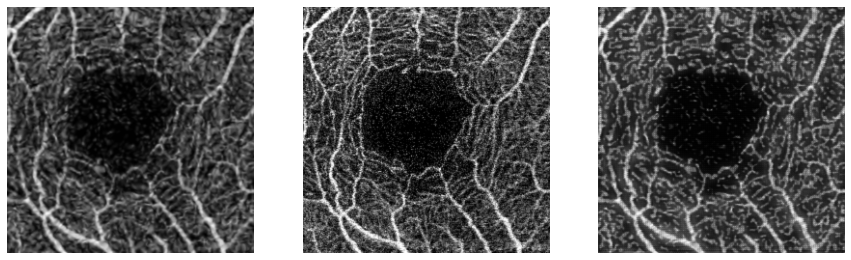

In [ ]:
netG_A2B.eval()
img = test_dataset[69]['A']
gt = test_dataset[69]['B']
# print(img.shape)
# img = cv2.resize(img.squeeze(0).cpu().numpy(), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
x = torch.tensor(img).unsqueeze(0).unsqueeze(0).cuda()

a, b = img_input(x[0])
_, _, y = netG_A2B(a, b)
# eval(netG_A2B)
plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(img[0], "gray")
plt.axis('off')
plt.subplot(132),plt.imshow(gt.squeeze(0), "gray")
plt.axis('off')
yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
plt.subplot(133), plt.imshow(yimg, "gray")
plt.axis('off')

ours_whole = yimg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(-0.5, 255.5, 255.5, -0.5)

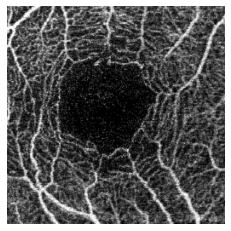

In [ ]:
img = test_dataset[69]['B']
x = torch.tensor(img).unsqueeze(0).cuda()
plt.imshow(img[0], "gray")
plt.axis('off')


(-0.5, 255.5, 255.5, -0.5)

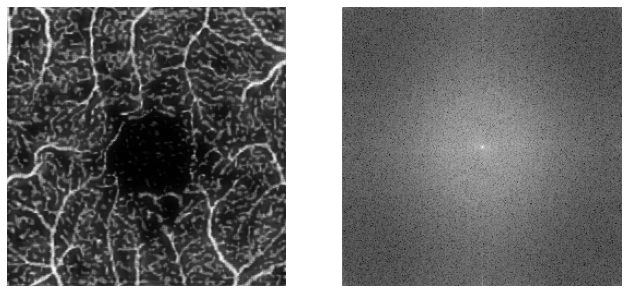

In [ ]:
f = np.fft.fft2(yimg, axes=(-2, -1))
fshift = np.fft.fftshift(f)
res = np.log(np.abs(fshift))
pha = np.angle(fshift)
plt.figure(figsize=(11, 11))
plt.subplot(121), plt.imshow(yimg, 'gray')
plt.axis('off')
plt.subplot(122), plt.imshow(res, 'gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

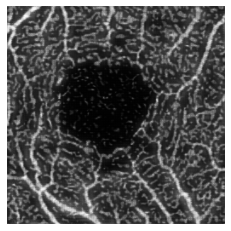

In [ ]:
# plt.figure(figsize=(5, 5))
ours_faz = yimg[64:192, 64:192]
plt.imshow(yimg, "gray")
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

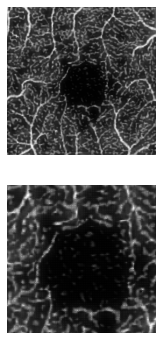

In [ ]:
plt.figure(figsize=(6, 6))
plt.subplot(211), plt.imshow(ours_whole, "gray")
plt.axis('off')
plt.subplot(212), plt.imshow(ours_whole[64:192, 64:192], "gray")
plt.axis('off')

Baseline Result Evaluation

In [ ]:
########## Baseline ################

In [ ]:
netG_A2B = torch.load('./pre_trained/resnet_baseline.pth')
type(netG_A2B)
model = ResnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)
img = test_dataset[69]['A']
gt = test_dataset[69]['B']
x = torch.tensor(img).unsqueeze(0).cuda()
y = model(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


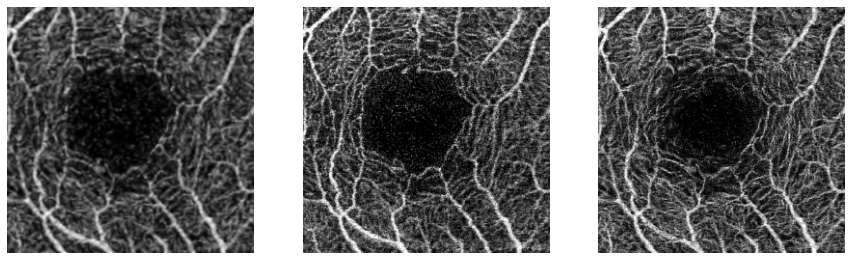

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(img.squeeze(0), "gray")
plt.axis('off')
plt.subplot(132),plt.imshow(gt.squeeze(0), "gray")
plt.axis('off')
yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
plt.subplot(133), plt.imshow(yimg, "gray")
plt.axis('off')

resnet_whole = yimg

(-0.5, 255.5, 255.5, -0.5)

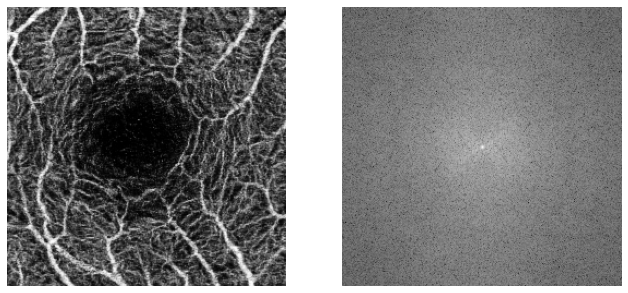

In [ ]:
f = np.fft.fft2(yimg, axes=(-2, -1))
fshift = np.fft.fftshift(f)
res = np.log(np.abs(fshift))
pha = np.angle(fshift)
plt.figure(figsize=(11, 11))
plt.subplot(121), plt.imshow(yimg, 'gray')
plt.axis('off')
plt.subplot(122), plt.imshow(res, 'gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

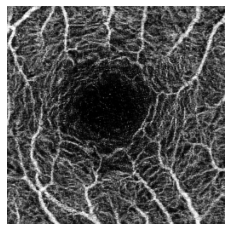

In [ ]:
resnet_faz = yimg[64:192, 64:192]
plt.imshow(yimg, "gray")
plt.axis('off')

In [ ]:
netG_A2B = torch.load('./pre_trained/unet_baseline.pth')
type(netG_A2B)
model = UnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)
img = test_dataset[69]['A']
gt = test_dataset[69]['B']
x = torch.tensor(img).unsqueeze(0).cuda()
y = model(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


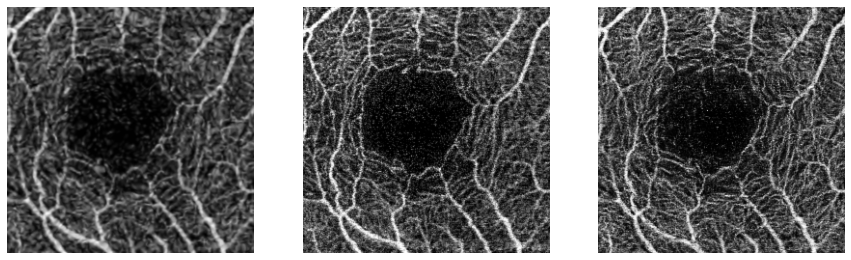

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(img.squeeze(0), "gray")
plt.axis('off')
plt.subplot(132),plt.imshow(gt.squeeze(0), "gray")
plt.axis('off')
yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
plt.subplot(133), plt.imshow(yimg, "gray")
plt.axis('off')

resnet_whole = yimg

(-0.5, 255.5, 255.5, -0.5)

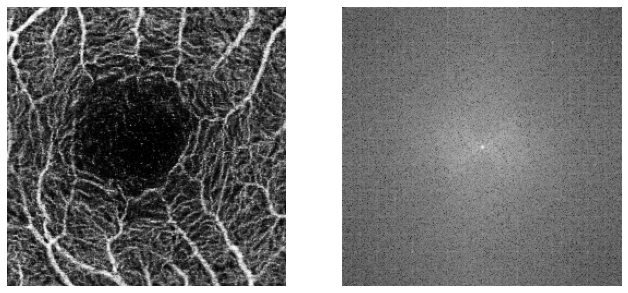

In [ ]:
f = np.fft.fft2(yimg, axes=(-2, -1))
fshift = np.fft.fftshift(f)
res = np.log(np.abs(fshift))
pha = np.angle(fshift)
plt.figure(figsize=(11, 11))
plt.subplot(121), plt.imshow(yimg, 'gray')
plt.axis('off')
plt.subplot(122), plt.imshow(res, 'gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

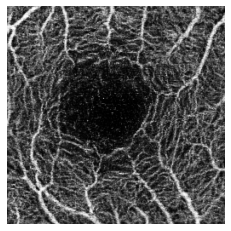

In [ ]:
resnet_faz = yimg[64:192, 64:192]
plt.imshow(yimg, "gray")
plt.axis('off')

Todo: 6x6-mm whole LR-HR results evaluation: part 1

In [ ]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
def eval_6m(model, dataset):
    n = len(dataset)
    num, psnr, ssim, mse, nmi= 0, 0, 0, 0, 0
    model.eval()
    for i in range(n):
        img = dataset[i]['A'].unsqueeze(0).cuda()
        gt = dataset[i]['B'].unsqueeze(0).cuda()
        y = img

        hf = utils.high_pass(img[0], i=10).unsqueeze(0).unsqueeze(0)
        hf = (hf+img)/2.0
        lf = utils.low_pass(img[0], i=8).unsqueeze(0).unsqueeze(0)
        
        _, _, y = model(lf, hf)

        yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
        
        # print(gt.shape)
        # print("fdsafasd fsdaf")
        gtimg = gt.cpu().detach().numpy().squeeze(0).squeeze(0)
        psnr += (skimage.metrics.peak_signal_noise_ratio(yimg, gtimg))
        ssim += (skimage.metrics.structural_similarity(yimg, gtimg))
        mse += (skimage.metrics.mean_squared_error(yimg, gtimg))
        nmi += (skimage.metrics.normalized_mutual_information(yimg, gtimg))
        num += 1
    print(" PSNR: %.4f SSIM: %.4f MSE: %.4f NMI: %.4f"%(psnr/num, ssim/num, mse/num, nmi/num))

In [ ]:
class ImageDataset_6mm(Dataset):
    def __init__(self, root, transforms_A=None, transforms_B=None, unaligned=False, mode='train'):
        self.transformA = transforms.Compose(transforms_A)
        self.transformB = transforms.Compose(transforms_B)

        self.unaligned = unaligned

        self.files_A = sorted(glob.glob(os.path.join(root, 'LR') + '/*.*'))
        # self.files_B = sorted(glob.glob(root + '/*.*'))

    def __getitem__(self, index):
        path_A = self.files_A[index % len(self.files_A)]

        path_B = path_A
        path_B = path_B.replace("_lr.", "_hr.").replace("LR", "HR")

        item_A = self.transformA(Image.open(path_A).convert('L'))
        item_B = self.transformB(Image.open(path_B).convert('L'))

        return {'A': item_A, 'B': item_B}

    def __len__(self):
        return len(self.files_A)

test_path = "./dataset/evalution_6mm/parts"
transforms_A = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                 
                transforms.CenterCrop(256),
                transforms.Normalize((0.5), (0.5)),
                # transforms.Resize((128, 128))
                ]
transforms_B = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(256)]
test_dataset = ImageDataset_6mm(test_path, transforms_A=transforms_A, transforms_B=transforms_B, unaligned=False)

(256, 256)


(-0.5, 255.5, 255.5, -0.5)

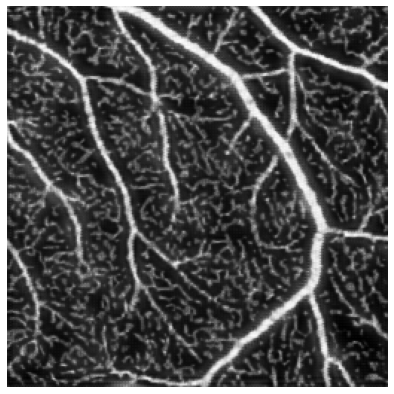

In [ ]:
i = 257
img = test_dataset[i]['A'].squeeze(0).cpu().numpy()
gt = test_dataset[i]['B']
print(img.shape)
# img = cv2.resize(img.squeeze(0).cpu().numpy(), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
x = torch.tensor(img).unsqueeze(0).unsqueeze(0).cuda()

netG_A2B = NetworkA2B().cuda()
netG_A2B.eval()
# model = torch.load("./output_exp/netG_A2B_epoch.pth")
# model = torch.load("./output_exp/netG_A2B_epoch46.pth")
model = torch.load("./pre_trained/netG_A2B_epoch34.pth")
netG_A2B.load_state_dict(model, strict=False)
a, b = img_input(x)
_, _, y = netG_A2B(a, b)
yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
plt.figure(figsize=(7, 7))
plt.imshow(yimg, "gray")
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

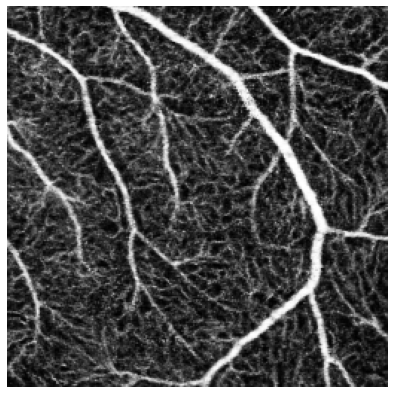

In [ ]:

# img = cv2.resize(img.squeeze(0).cpu().numpy(), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
x = torch.tensor(img).unsqueeze(0).unsqueeze(0).cuda()

# model = torch.load("./output_exp/netG_A2B_epoch.pth")
# model = torch.load("./output_exp/netG_A2B_epoch46.pth")
netG_A2B = torch.load('./pre_trained/unet_baseline.pth')
model = UnetGenerator(1, 1).cuda()

model.load_state_dict(netG_A2B, strict=False)
y = model(x)
plt.figure(figsize=(7, 7))
plt.imshow(y.cpu().detach().numpy()[0][0], "gray")
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

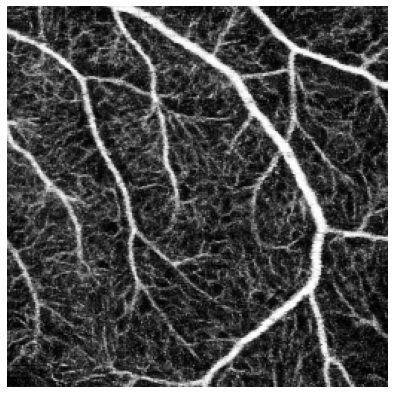

In [ ]:

# img = cv2.resize(img.squeeze(0).cpu().numpy(), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
x = torch.tensor(img).unsqueeze(0).unsqueeze(0).cuda()

# model = torch.load("./output_exp/netG_A2B_epoch.pth")
# model = torch.load("./output_exp/netG_A2B_epoch46.pth")
netG_A2B = torch.load('./pre_trained/resnet_baseline.pth')
model = ResnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)
y = model(x)
plt.figure(figsize=(7, 7))
plt.imshow(y.cpu().detach().numpy()[0][0], "gray")
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

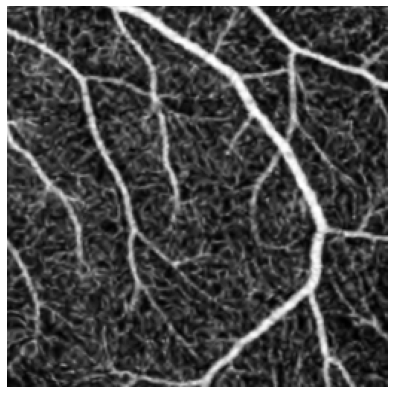

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(img, "gray")
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

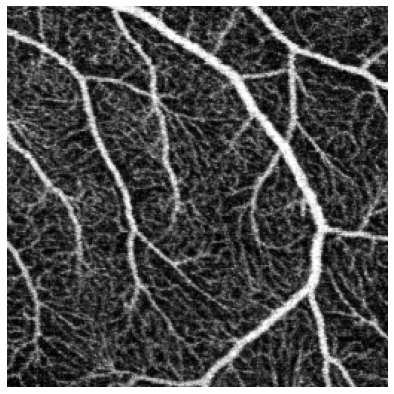

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(gt[0], "gray")
plt.axis('off')

In [ ]:
def eval_6m(model, dataset):
    n = len(dataset)
    num, psnr, ssim, mse, nmi= 0, 0, 0, 0, 0
    mx, out = 0, 0
    model.eval()
    for i in range(n):
        img = dataset[i]['A'].unsqueeze(0).cuda()
        gt = dataset[i]['B'].unsqueeze(0).cuda()


        hf = utils.high_pass(img[0], i=10).unsqueeze(0).unsqueeze(0)
        hf = (hf+img)/2.0
        lf = utils.low_pass(img[0], i=8).unsqueeze(0).unsqueeze(0)
        _, _, y = model(lf, hf)

        yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
        
        # print(gt.shape)
        # print("fdsafasd fsdaf")
        gtimg = gt.cpu().detach().numpy().squeeze(0).squeeze(0)
        s = (skimage.metrics.peak_signal_noise_ratio(yimg, gtimg))
        psnr += s
        if s > mx:
          out = i
        ssim += (skimage.metrics.structural_similarity(yimg, gtimg))
        mse += (skimage.metrics.mean_squared_error(yimg, gtimg))
        nmi += (skimage.metrics.normalized_mutual_information(yimg, gtimg))
        num += 1
    print(" PSNR: %.4f SSIM: %.4f MSE: %.4f NMI: %.4f"%(psnr/num, ssim/num, mse/num, nmi/num))
    print(out)

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(img, "gray")
print(gt.squeeze(0).shape)
plt.axis('off')


In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(gt.squeeze(0), "gray")
plt.axis('off')

In [ ]:
transforms_A = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                 
                transforms.CenterCrop(256),
                transforms.Normalize((0.5), (0.5))
                ]
transforms_B = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(256)]
test_dataset = ImageDataset_6mm(test_path, transforms_A=transforms_A, transforms_B=transforms_B, unaligned=False)

netG_A2B = torch.load('./pre_trained/unet_baseline.pth')
type(netG_A2B)
model = UnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)

img = test_dataset[5]['A']
gt = test_dataset[5]['B']
x = torch.tensor(img).unsqueeze(0).cuda()
y = model(x)
yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
plt.figure(figsize=(7, 7))
plt.imshow(yimg, "gray")
plt.axis('off')

In [ ]:
netG_A2B = torch.load('./pre_trained/resnet_baseline.pth')
type(netG_A2B)
model = ResnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)

img = test_dataset[5]['A']
gt = test_dataset[5]['B']
x = torch.tensor(img).unsqueeze(0).cuda()
y = model(x)
yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
plt.figure(figsize=(7, 7))
plt.imshow(yimg, "gray")
plt.axis('off')

In [ ]:
eval_6m_baseline(model, test_dataset)

TypeError: ignored

In [ ]:
transforms_A = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)), 
                transforms.CenterCrop(256)
                ]
transforms_B = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(256)]
test_dataset = ImageDataset_6mm(test_path, transforms_A=transforms_A, transforms_B=transforms_B, unaligned=False)

netG_A2B = torch.load('./pre_trained/unet_baseline.pth')
# netG_A2B = torch.load('./baseline_output_unet/netG_A2B_epoch90.pth')
type(netG_A2B)
model = UnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)
eval_6m_baseline(model, test_dataset)

transforms_A = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)), 
                transforms.CenterCrop(256)
                ]
transforms_B = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(256)]
test_dataset = ImageDataset_6mm(test_path, transforms_A=transforms_A, transforms_B=transforms_B, unaligned=False)

netG_A2B = torch.load('./pre_trained/resnet_baseline.pth')
type(netG_A2B)
model = ResnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)
eval_6m_baseline(model, test_dataset)

In [ ]:
transforms_A = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)), 
                transforms.CenterCrop(256)
                ]
transforms_B = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(256)]
test_dataset = ImageDataset_6mm(test_path, transforms_A=transforms_A, transforms_B=transforms_B, unaligned=False)

netG_A2B = NetworkA2B().cuda()
model = torch.load("./pre_trained/netG_A2B_epoch34.pth")
# model = torch.load("./output_exp/netG_A2B_epoch10.pth")
netG_A2B.load_state_dict(model, strict=False)
eval_6m(netG_A2B, test_dataset)

 PSNR: 17.6221 SSIM: 0.4990 MSE: 0.0705 NMI: 1.0606


Todo: 6x6-mm whole LR-HR results evaluation: part 2





In [ ]:
test_path = "./dataset/evalution_6mm/whole"
transforms_A = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)), 
                transforms.CenterCrop(512),
                # transforms.Resize((256, 256))
                ]
transforms_B = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(512)]
test_dataset = ImageDataset_6mm(test_path, transforms_A=transforms_A, transforms_B=transforms_B, unaligned=False)

In [ ]:
img = test_dataset[0]['A']
gt = test_dataset[0]['B']
x = img.unsqueeze(0).cuda()
y = netG_A2B(x)

TypeError: ignored

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img.squeeze(0), "gray")
print(gt.squeeze(0).shape)
plt.axis('off')
plt.subplot(132),plt.imshow(gt.squeeze(0), "gray")
plt.axis('off')
yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
plt.subplot(133), plt.imshow(yimg, "gray")
plt.axis('off')

Todo: 6x6-mm whole LR-HR results evaluation: part 3

(-0.5, 511.5, 511.5, -0.5)

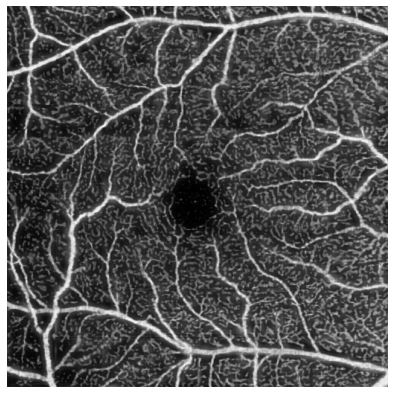

In [ ]:
file = "094OD"
path = "./dataset/evalution_6mm/sample_6mm/STDR"+file+"_lr.png"
path_gt = "./dataset/evalution_6mm/sample_6mm/STDR"+file+"_hr.png"
transform_list = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(512)]
T = transforms.Compose(transform_list)
x = T(Image.open(path).convert('L')).unsqueeze(0).cuda()

T_gt = transforms.Compose(transform_list)
gt_img = T_gt(Image.open(path_gt).convert('L')).unsqueeze(0).cuda()

netG_A2B = NetworkA2B().cuda()
netG_A2B.eval()
# model = torch.load("./output_exp/netG_A2B_epoch79.pth")
model = torch.load("./pre_trained/netG_A2B_epoch34.pth")
netG_A2B.load_state_dict(model, strict=False)

out_1 = np.zeros([1, 1, 512, 512])
for i in [0, 64, 128, 192, 256]:
  for j in [0, 64, 128, 192, 256]:
    a, b = img_input(x[:, :, i:i+256, j:j+256])
    _, _, y = netG_A2B(a, b)
    out_1[:, :, i:i+256, j:j+256] = y.cpu().detach().numpy()
out = (out_1)
for i in [64, 192]:
  for j in [64, 192]:
    a, b = img_input(x[:, :, i:i+256, j:j+256])
    _, _, y = netG_A2B(a, b)
    out[:, :, i:i+256, j:j+256] = y.cpu().detach().numpy()
    a, b = img_input(x[:, :, i:i+256, j:j+256])
    _, _, y = netG_A2B(a, b)
    out[:, :, i:i+256, j:j+256] = y.cpu().detach().numpy()
i=j=128
a, b = img_input(x[:, :, i:i+256, j:j+256])
_, _, y = netG_A2B(a, b)
out[:, :, i:i+256, j:j+256] = y.cpu().detach().numpy()


x, y, gt = x.cpu().squeeze(0).squeeze(0), out[0, 0, :, :], gt_img.cpu().squeeze(0).squeeze(0)
plt.figure(figsize=(7, 7))
plt.imshow(y, "gray")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

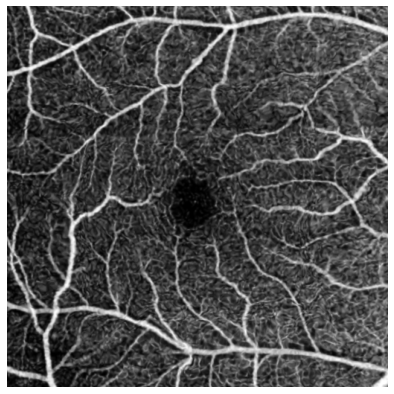

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(x, "gray")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

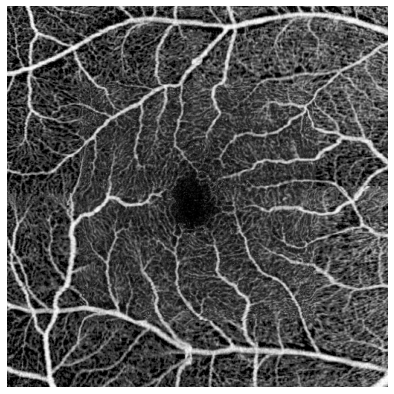

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(gt, "gray")
plt.axis('off')

In [ ]:
file = "094OD"
path = "./dataset/evalution_6mm/sample_6mm/STDR"+file+"_lr.png"
path_gt = "./dataset/evalution_6mm/sample_6mm/STDR"+file+"_hr.png"
transform_list = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(512)]
T = transforms.Compose(transform_list)
x = T(Image.open(path).convert('L')).unsqueeze(0).cuda()

T_gt = transforms.Compose(transform_list)
gt_img = T_gt(Image.open(path_gt).convert('L')).unsqueeze(0).cuda()


netG_A2B = NetworkA2B().cuda()
# model = torch.load("./output_exp/netG_A2B_epoch79.pth")
model = torch.load("./pre_trained/netG_A2B_epoch51.pth")
model.load_state_dict(netG_A2B, strict=False)
y = model(x)
plt.figure(figsize=(7, 7))
plt.imshow(y.cpu().detach().numpy()[0][0], "gray")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

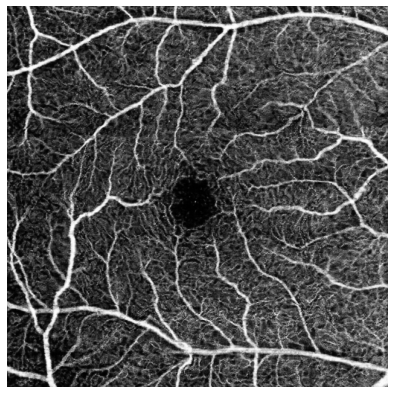

In [ ]:
file = "094OD"
path = "./dataset/evalution_6mm/sample_6mm/STDR"+file+"_lr.png"
path_gt = "./dataset/evalution_6mm/sample_6mm/STDR"+file+"_hr.png"
transform_list = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(512)]
T = transforms.Compose(transform_list)
x = T(Image.open(path).convert('L')).unsqueeze(0).cuda()

T_gt = transforms.Compose(transform_list)
gt_img = T_gt(Image.open(path_gt).convert('L')).unsqueeze(0).cuda()

netG_A2B = torch.load('./pre_trained/unet_baseline.pth')
model = UnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)
y = model(x)
plt.figure(figsize=(7, 7))
plt.imshow(y.cpu().detach().numpy()[0][0], "gray")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

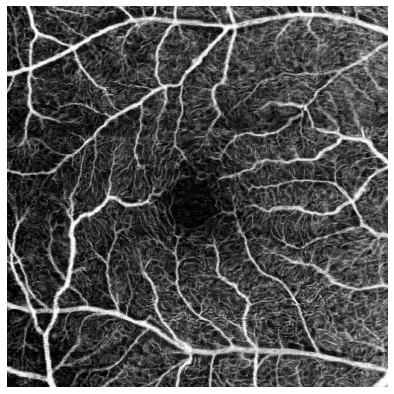

In [ ]:
file = "094OD"
path = "./dataset/evalution_6mm/sample_6mm/STDR"+file+"_lr.png"
path_gt = "./dataset/evalution_6mm/sample_6mm/STDR"+file+"_hr.png"
transform_list = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(512)]
T = transforms.Compose(transform_list)
x = T(Image.open(path).convert('L')).unsqueeze(0).cuda()

T_gt = transforms.Compose(transform_list)
gt_img = T_gt(Image.open(path_gt).convert('L')).unsqueeze(0).cuda()

netG_A2B = torch.load('./pre_trained/resnet_baseline.pth')
model = ResnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)
y = model(x)
plt.figure(figsize=(7, 7))
plt.imshow(y.cpu().detach().numpy()[0][0], "gray")
plt.axis('off')

TODO: 6-mm numerical evaluation

In [ ]:
img = test_dataset[5]['A'].squeeze(0).cpu().numpy()
gt = test_dataset[5]['B']
gtimg = gt.cpu().detach().numpy().squeeze(0)
print(img.shape)
# img = cv2.resize(img.squeeze(0).cpu().numpy(), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
x = torch.tensor(img).unsqueeze(0).unsqueeze(0).cuda()


netG_A2B = NetworkA2B().cuda()
# model = torch.load("./output_exp/netG_A2B_epoch79.pth")
model = torch.load("./pre_trained/netG_A2B_epoch51.pth")
netG_A2B.load_state_dict(model, strict=False)
a, b = img_input(x)
_, _, y = netG_A2B(a, b)
yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
plt.figure(figsize=(7, 7))
plt.subplot(121), plt.imshow(yimg, "gray")
plt.axis('off')
plt.subplot(122), plt.imshow(gt.squeeze(0), "gray")
plt.axis('off')

psnr = (skimage.metrics.peak_signal_noise_ratio(yimg, gtimg))
ssim = (skimage.metrics.structural_similarity(yimg, gtimg))
mse = (skimage.metrics.mean_squared_error(yimg, gtimg))
nmi = (skimage.metrics.normalized_mutual_information(yimg, gtimg))
print(" PSNR: %.4f SSIM: %.4f MSE: %.4f NMI: %.4f"%(psnr, ssim, mse, nmi))

In [ ]:
transforms_A = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                 
                transforms.CenterCrop(256),
                transforms.Normalize((0.5), (0.5))
                ]
transforms_B = [ 
                transforms.ToTensor(),
                # transforms.Normalize((0.246), (0.170)),
                transforms.Normalize((0.5), (0.5)),
                transforms.CenterCrop(256)]
test_dataset = ImageDataset_6mm(test_path, transforms_A=transforms_A, transforms_B=transforms_B, unaligned=False)

netG_A2B = torch.load('./pre_trained/unet_baseline.pth')
type(netG_A2B)
model = UnetGenerator(1, 1).cuda()
model.load_state_dict(netG_A2B, strict=False)

img = test_dataset[5]['A'].squeeze(0).cpu().numpy()
# img = cv2.resize(img.squeeze(0).cpu().numpy(), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
gt = test_dataset[5]['B']
gtimg = gt.cpu().detach().numpy().squeeze(0)
x = torch.tensor(img).unsqueeze(0).unsqueeze(0).cuda()
y = model(x)
yimg = y.cpu().detach().numpy().squeeze(0).squeeze(0)
plt.figure(figsize=(7, 7))
plt.subplot(121), plt.imshow(yimg, "gray")
plt.axis('off')
plt.subplot(122), plt.imshow(gt.squeeze(0), "gray")
plt.axis('off')

psnr = (skimage.metrics.peak_signal_noise_ratio(yimg, gtimg))
ssim = (skimage.metrics.structural_similarity(yimg, gtimg))
mse = (skimage.metrics.mean_squared_error(yimg, gtimg))
nmi = (skimage.metrics.normalized_mutual_information(yimg, gtimg))
print(" PSNR: %.4f SSIM: %.4f MSE: %.4f NMI: %.4f"%(psnr, ssim, mse, nmi))